In [2]:
import pandas as pd 
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\historial_peleas.csv")
df


,Fecha,Peleador_A,Peleador_B,KD_A,KD_R_A,KD_B,KD_R_B,SIG_STR_A,SIG_STR_R_A,SIG_STR_B,...,STR_GROUND_T_B,STR_GROUND_T_R_B,STR_GROUND_M_A,STR_GROUND_M_R_A,STR_GROUND_M_B,STR_GROUND_M_R_B,Puntos_A,Puntos_B,Racha_A,Racha_B
0,1999-01-08,Laverne Clark,Frank Caracci,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,1999-01-08,Evan Tanner,Darrel Gholar,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,1999-01-08,Mikey Burnett,Townsend Saunders,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,1999-01-08,Tito Ortiz,Jerry Bohlander,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,1999-01-08,Pedro Rizzo,Mark Coleman,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,2025-02-15,Jonathan Micallef,Kevin Jousset,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.553333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
7840,2025-02-15,Quillan Salkilld,Anshul Jubli,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.635000,...,0.432432,1.000000,0.000000,0.000000,0.432432,1.000000,0.000000,1.692156,0,0
7841,2025-02-15,Dricus Du Plessis,Sean Strickland,0.5,0.000000,0.272727,0.136364,0.512500,0.430000,0.418636,...,0.305458,0.123504,0.710570,0.356944,0.305458,0.123504,1266.108397,441.500554,8,1
7842,2025-02-15,Wang Cong,Bruna Brasil,0.5,0.500000,0.000000,0.250000,0.395000,0.205000,0.582500,...,0.361111,0.419118,0.000000,0.000000,0.361111,0.419118,0.000000,13.490938,0,1


In [4]:
df.columns

Index(['Fecha', 'Peleador_A', 'Peleador_B', 'KD_A', 'KD_R_A', 'KD_B', 'KD_R_B',
       'SIG_STR_A', 'SIG_STR_R_A', 'SIG_STR_B', 'SIG_STR_R_B', 'TD_PORC_A',
       'TD_PORC_R_A', 'TD_PORC_B', 'TD_PORC_R_B', 'SUB_ATT_A', 'SUB_ATT_R_A',
       'SUB_ATT_B', 'SUB_ATT_R_B', 'REV_A', 'REV_R_A', 'REV_B', 'REV_R_B',
       'CTRL_A', 'CTRL_R_A', 'CTRL_B', 'CTRL_R_B', 'TD_T_A', 'TD_T_R_A',
       'TD_T_B', 'TD_T_R_B', 'TD_M_A', 'TD_M_R_A', 'TD_M_B', 'TD_M_R_B',
       'TOTAL_STR_T_A', 'TOTAL_STR_T_R_A', 'TOTAL_STR_T_B', 'TOTAL_STR_T_R_B',
       'TOTAL_STR_M_A', 'TOTAL_STR_M_R_A', 'TOTAL_STR_M_B', 'TOTAL_STR_M_R_B',
       'STR_HEAD_T_A', 'STR_HEAD_T_R_A', 'STR_HEAD_T_B', 'STR_HEAD_T_R_B',
       'STR_HEAD_M_A', 'STR_HEAD_M_R_A', 'STR_HEAD_M_B', 'STR_HEAD_M_R_B',
       'STR_BODY_T_A', 'STR_BODY_T_R_A', 'STR_BODY_T_B', 'STR_BODY_T_R_B',
       'STR_BODY_M_A', 'STR_BODY_M_R_A', 'STR_BODY_M_B', 'STR_BODY_M_R_B',
       'STR_LEG_T_A', 'STR_LEG_T_R_A', 'STR_LEG_T_B', 'STR_LEG_T_R_B',
       'STR_LEG_

El objetivo de este análisis es evaluar la relación entre la cantidad de **golpes significativos** realizados por los peleadores y el **resultado de la pelea** (victoria o derrota). Se busca determinar si un mayor número de golpes significativos está asociado con una mayor probabilidad de ganar, comparando el rendimiento de los peleadores en victorias y derrotas. Además, se pretende identificar si existe un patrón entre los golpes dados y el resultado final, lo que podría ser útil para desarrollar estrategias en peleas futuras.

C:\Users\araca\AppData\Local\Temp\ipykernel_6200\301366585.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Peleador A (Ganador)', 'Peleador B (Ganador)', 'Peleador A (Perdedor)', 'Peleador B (Perdedor)'],


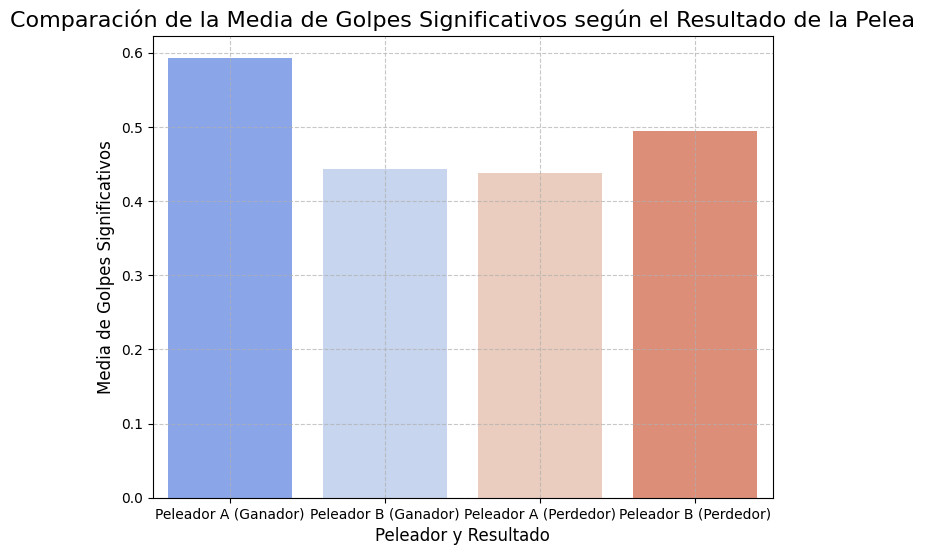

In [10]:
# Media de los Golpes Significativos según el Resultado de la Pelea
mean_sig_str_A_win = df[df['Winner'] == 1]['SIG_STR_A'].mean()
mean_sig_str_B_win = df[df['Winner'] == 1]['SIG_STR_B'].mean()
mean_sig_str_A_loss = df[df['Winner'] == 0]['SIG_STR_A'].mean()
mean_sig_str_B_loss = df[df['Winner'] == 0]['SIG_STR_B'].mean()

# Crear un gráfico de barras para comparar las medias
plt.figure(figsize=(8,6))
sns.barplot(x=['Peleador A (Ganador)', 'Peleador B (Ganador)', 'Peleador A (Perdedor)', 'Peleador B (Perdedor)'], 
            y=[mean_sig_str_A_win, mean_sig_str_B_win, mean_sig_str_A_loss, mean_sig_str_B_loss], 
            palette='coolwarm')
plt.title("Comparación de la Media de Golpes Significativos según el Resultado de la Pelea", fontsize=16)
plt.xlabel("Peleador y Resultado", fontsize=12)
plt.ylabel("Media de Golpes Significativos", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


El análisis indica que, en general, los peleadores tienden a tener un mayor número de golpes significativos en las peleas que ganan en comparación con las que pierden. Sin embargo, la relación no es la misma para todos los casos. Mientras que, en promedio, los peleadores muestran un mayor número de golpes significativos en las victorias, también se observa que algunos peleadores tienen una mayor actividad en peleas perdidas sin que esto se traduzca en un desempeño exitoso. Esto sugiere que, aunque la cantidad de golpes es un factor importante, no es el único determinante de una victoria. Otros factores como la precisión, el control de la pelea, la defensa o la estrategia general parecen jugar un papel clave en el resultado final.

Este estudio es interesante porque nos permite observar cómo la diferencia de golpes significativos entre los dos peleadores se asocia con el resultado final de la pelea (victoria o derrota). Al comparar la distribución de la diferencia de golpes significativos en peleas ganadas y perdidas, podemos identificar si una diferencia mayor a favor de un peleador está relacionada con una mayor probabilidad de victoria. Esto puede ofrecer información valiosa sobre la estrategia de pelea y qué tan decisiva es la efectividad en los golpes significativos para determinar el vencedor. Además, entender estas distribuciones ayuda a resaltar patrones y posibles debilidades en los peleadores, como la capacidad de un perdedor para lanzar muchos golpes sin lograr una diferencia significativa, lo que podría sugerir una falta de precisión o eficiencia en su ataque.

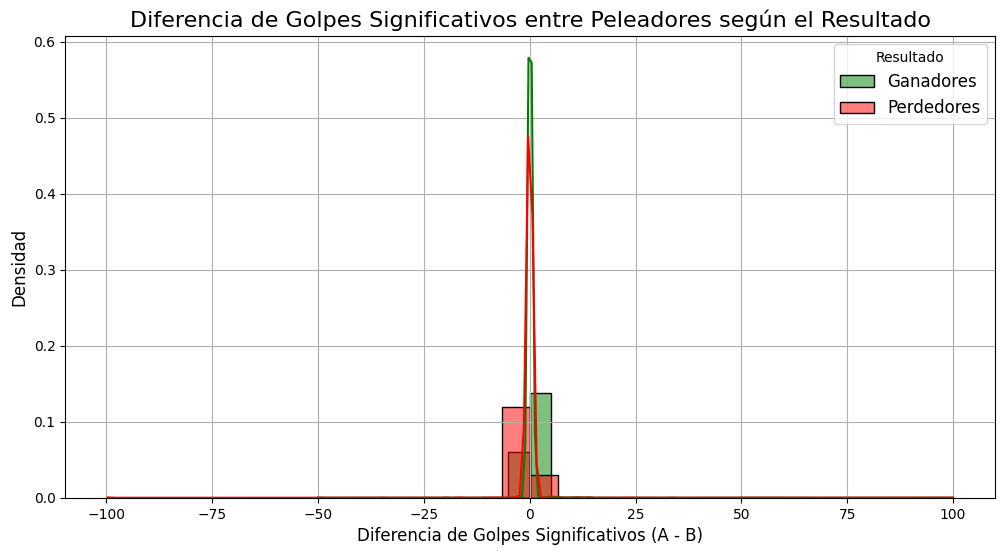

In [11]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Winner'] == 1]['SIG_STR_DIFF'], kde=True, color='green', bins=30, stat="density", label='Ganadores')
sns.histplot(df[df['Winner'] == 0]['SIG_STR_DIFF'], kde=True, color='red', bins=30, stat="density", label='Perdedores')
plt.title("Diferencia de Golpes Significativos entre Peleadores según el Resultado", fontsize=16)
plt.xlabel("Diferencia de Golpes Significativos (A - B)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Resultado", fontsize=12)
plt.grid(True)
plt.show()


Al observar la distribución de la diferencia de golpes significativos entre los peleadores según el resultado de la pelea, se nota que los ganadores, en general, tienden a tener una diferencia positiva en los golpes significativos, lo que indica que, en promedio, lograron conectar más golpes que sus oponentes. Sin embargo, también se observa una amplia dispersión en los datos, lo que sugiere que la diferencia de golpes significativos varía considerablemente entre las peleas, con algunas en las que la disparidad es muy grande y otras en las que es mínima o incluso negativa.

Por otro lado, los perdedores muestran una tendencia a tener una diferencia negativa, lo que indica que, en promedio, conectaron menos golpes que sus oponentes. A pesar de esta tendencia, la distribución de los datos de los perdedores es más dispersa, con una gran cantidad de peleas donde la diferencia es pequeña o incluso nula, pero también con algunas peleas donde la diferencia es bastante amplia, mostrando una gran variabilidad en los resultados.

En conjunto, esto sugiere que aunque la diferencia en golpes significativos puede influir en el resultado de una pelea, no es el único factor determinante. La variabilidad en las diferencias de golpes, tanto entre ganadores como perdedores, señala que existen otros elementos, como la estrategia, el control del combate o la capacidad de derribar al oponente, que también juegan un papel clave en el resultado final.

Este análisis es interesante porque permite evaluar la relación entre el porcentaje de derribos de los peleadores y el resultado final de la pelea, lo que puede proporcionar información clave sobre cómo el control del combate en el suelo puede influir en la victoria o la derrota. Al comparar los porcentajes de derribos de los peleadores A y B para los ganadores y los perdedores, se puede observar si existe una diferencia significativa entre los que logran derribar a su oponente de manera más eficiente y los que no. Si los ganadores tienen consistentemente un mayor porcentaje de derribos, esto podría indicar que el control del combate en el suelo es un factor importante para determinar el resultado de la pelea. Además, ver la distribución de derribos en las peleas perdidas puede ayudar a identificar si los perdedores fallaron en capitalizar sus oportunidades de derribo o si, a pesar de haber derribado a su oponente, no lograron controlar otras áreas importantes del combate. En resumen, este análisis proporciona una visión más profunda de la dinámica de las peleas, especialmente en términos de la importancia de los derribos para el desempeño general de los peleadores.

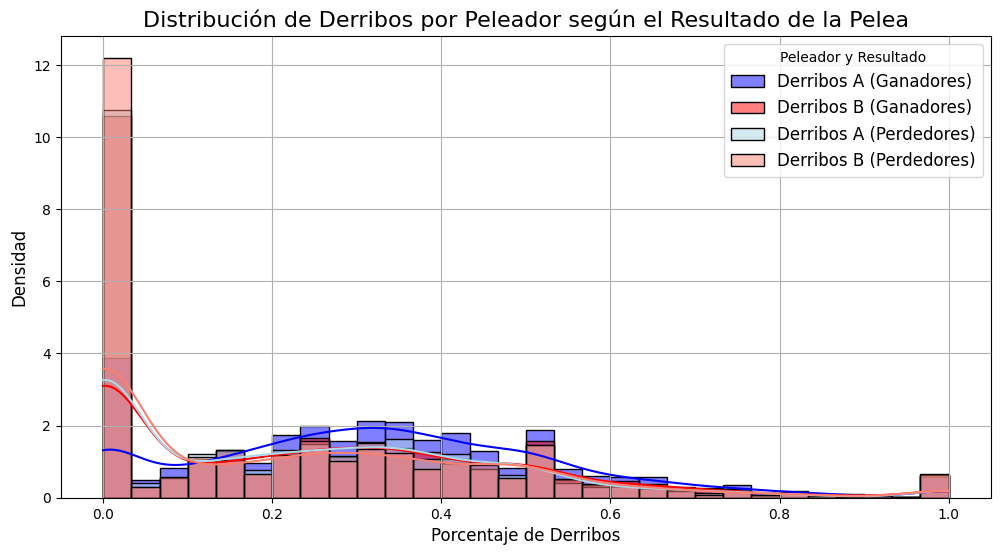

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Winner'] == 1]['TD_PORC_A'], kde=True, color='blue', label='Derribos A (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 1]['TD_PORC_B'], kde=True, color='red', label='Derribos B (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 0]['TD_PORC_A'], kde=True, color='lightblue', label='Derribos A (Perdedores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 0]['TD_PORC_B'], kde=True, color='salmon', label='Derribos B (Perdedores)', bins=30, stat="density")
plt.title("Distribución de Derribos por Peleador según el Resultado de la Pelea", fontsize=16)
plt.xlabel("Porcentaje de Derribos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador y Resultado", fontsize=12)
plt.grid(True)
plt.show()


La gráfica muestra que en los casos donde el porcentaje de derribos es bajo, la densidad de los derribos realizados por los perdedores es significativamente mayor que la de los ganadores. Específicamente, tanto los derribos de A como de B en los perdedores alcanzan valores cercanos a 12 y 11 de densidad, respectivamente, mientras que los derribos de los ganadores se encuentran alrededor de 10 y 4. A medida que el porcentaje de derribos aumenta, la densidad de los derribos realizados por los perdedores disminuye notablemente, lo que sugiere que los perdedores tienen un menor porcentaje de derribos en los momentos en que su desempeño es más eficiente en comparación con los ganadores. Por otro lado, la densidad de los derribos de los ganadores se mantiene en valores más constantes (alrededor de 2 y 1), lo que indica que su desempeño en términos de derribos es más consistente a lo largo del tiempo. Este patrón resalta una posible correlación entre un porcentaje más bajo de derribos y el hecho de que los perdedores logran derribar con mayor frecuencia, mientras que los ganadores parecen mantener un rendimiento más equilibrado.

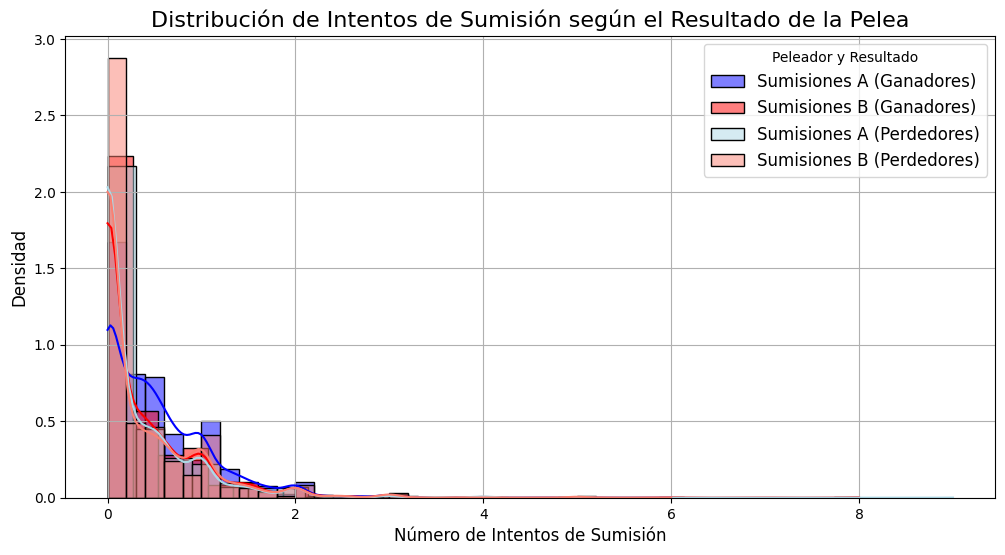

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Winner'] == 1]['SUB_ATT_A'], kde=True, color='blue', label='Sumisiones A (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 1]['SUB_ATT_B'], kde=True, color='red', label='Sumisiones B (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 0]['SUB_ATT_A'], kde=True, color='lightblue', label='Sumisiones A (Perdedores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 0]['SUB_ATT_B'], kde=True, color='salmon', label='Sumisiones B (Perdedores)', bins=30, stat="density")
plt.title("Distribución de Intentos de Sumisión según el Resultado de la Pelea", fontsize=16)
plt.xlabel("Número de Intentos de Sumisión", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador y Resultado", fontsize=12)
plt.grid(True)
plt.show()


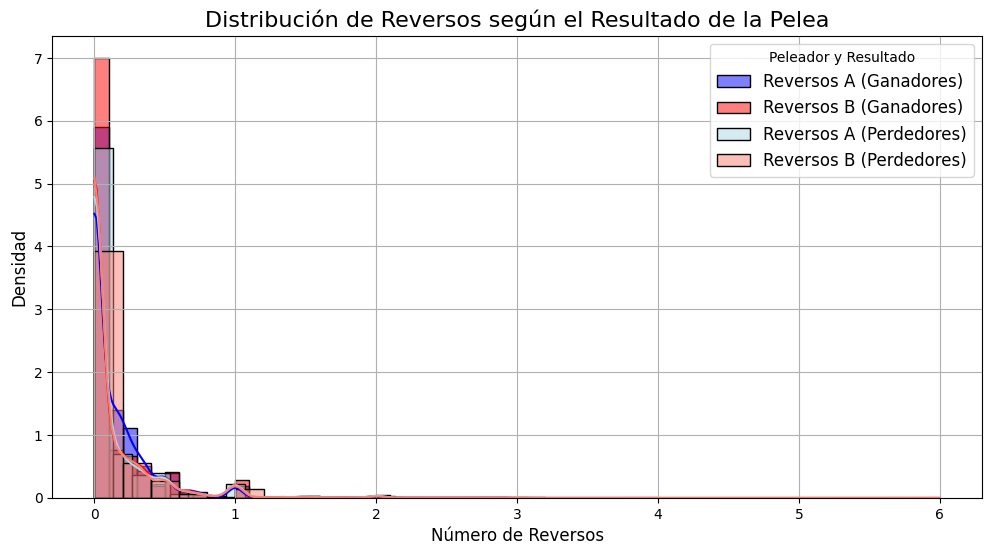

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Winner'] == 1]['REV_A'], kde=True, color='blue', label='Reversos A (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 1]['REV_B'], kde=True, color='red', label='Reversos B (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 0]['REV_A'], kde=True, color='lightblue', label='Reversos A (Perdedores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 0]['REV_B'], kde=True, color='salmon', label='Reversos B (Perdedores)', bins=30, stat="density")
plt.title("Distribución de Reversos según el Resultado de la Pelea", fontsize=16)
plt.xlabel("Número de Reversos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador y Resultado", fontsize=12)
plt.grid(True)
plt.show()


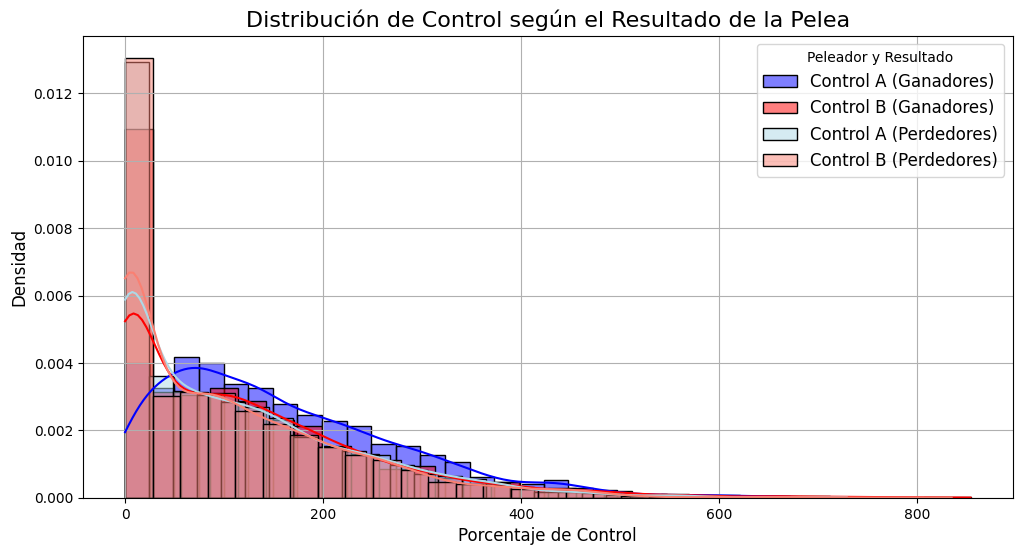

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Winner'] == 1]['CTRL_A'], kde=True, color='blue', label='Control A (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 1]['CTRL_B'], kde=True, color='red', label='Control B (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 0]['CTRL_A'], kde=True, color='lightblue', label='Control A (Perdedores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 0]['CTRL_B'], kde=True, color='salmon', label='Control B (Perdedores)', bins=30, stat="density")
plt.title("Distribución de Control según el Resultado de la Pelea", fontsize=16)
plt.xlabel("Porcentaje de Control", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador y Resultado", fontsize=12)
plt.grid(True)
plt.show()


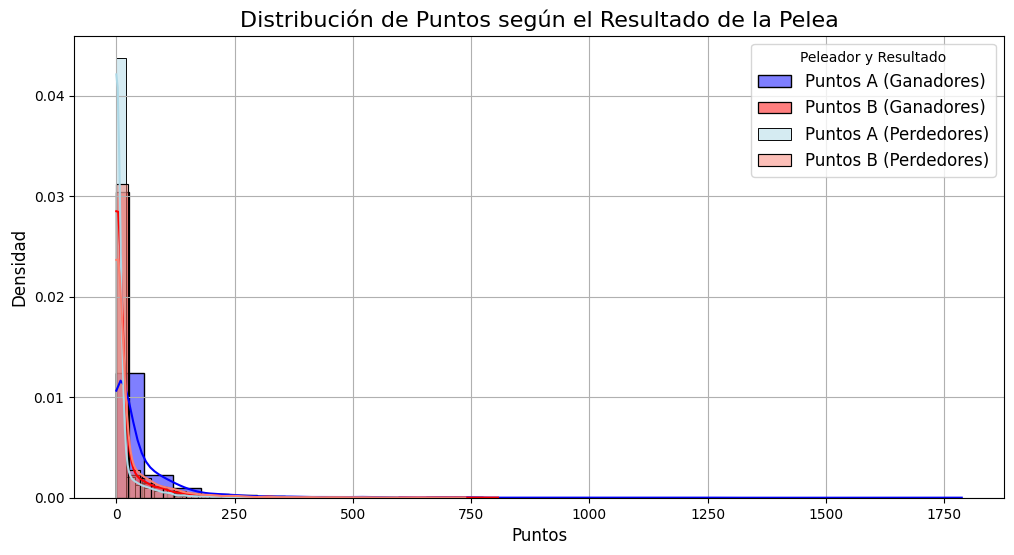

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Winner'] == 1]['Puntos_A'], kde=True, color='blue', label='Puntos A (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 1]['Puntos_B'], kde=True, color='red', label='Puntos B (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 0]['Puntos_A'], kde=True, color='lightblue', label='Puntos A (Perdedores)', bins=30, stat="density")
sns.histplot(df[df['Winner'] == 0]['Puntos_B'], kde=True, color='salmon', label='Puntos B (Perdedores)', bins=30, stat="density")
plt.title("Distribución de Puntos según el Resultado de la Pelea", fontsize=16)
plt.xlabel("Puntos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador y Resultado", fontsize=12)
plt.grid(True)
plt.show()


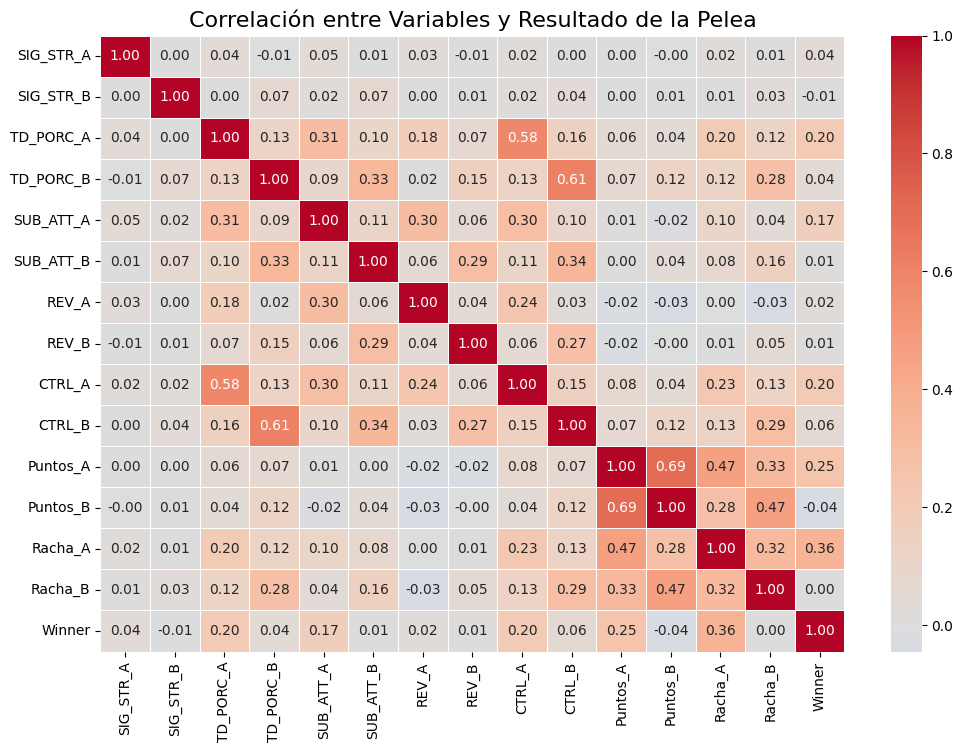

In [8]:
# Crear una columna 'Winner' que indique si A o B ganó
df['Winner'] = (df['Puntos_A'] > df['Puntos_B']).astype(int)  # 1 = Peleador A ganó, 0 = Peleador B ganó

# Seleccionar las variables numéricas relevantes para el análisis
variables_relevantes = ['SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B', 
                        'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B', 'Puntos_A', 'Puntos_B', 'Racha_A', 'Racha_B']

# Calcular la correlación entre las variables y el resultado
correlation_matrix = df[variables_relevantes + ['Winner']].corr()

# Mostrar la correlación
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title("Correlación entre Variables y Resultado de la Pelea", fontsize=16)
plt.show()


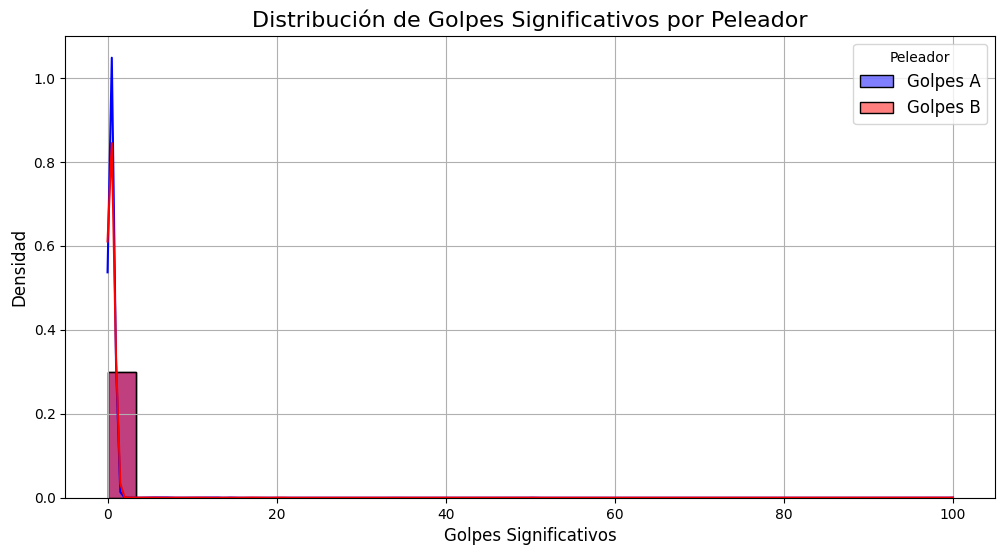

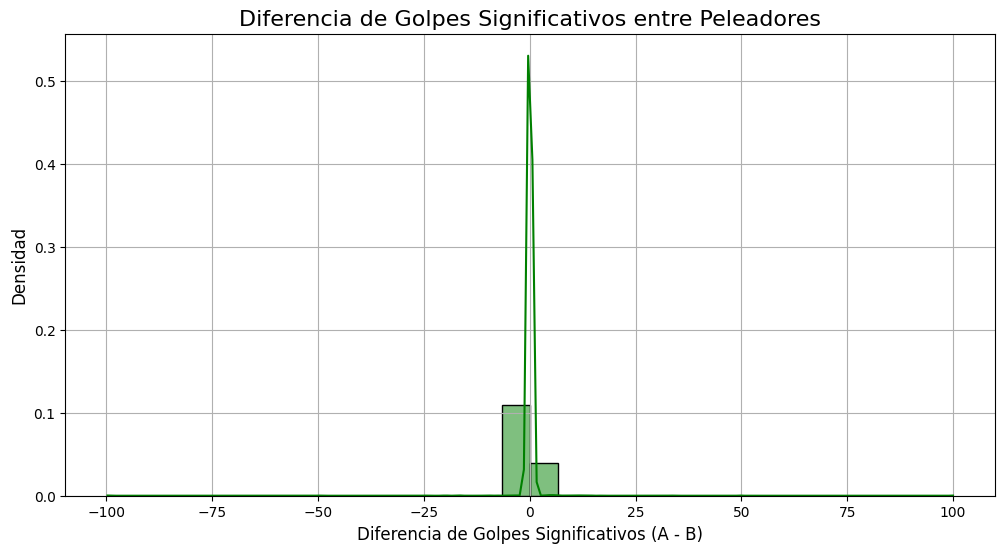

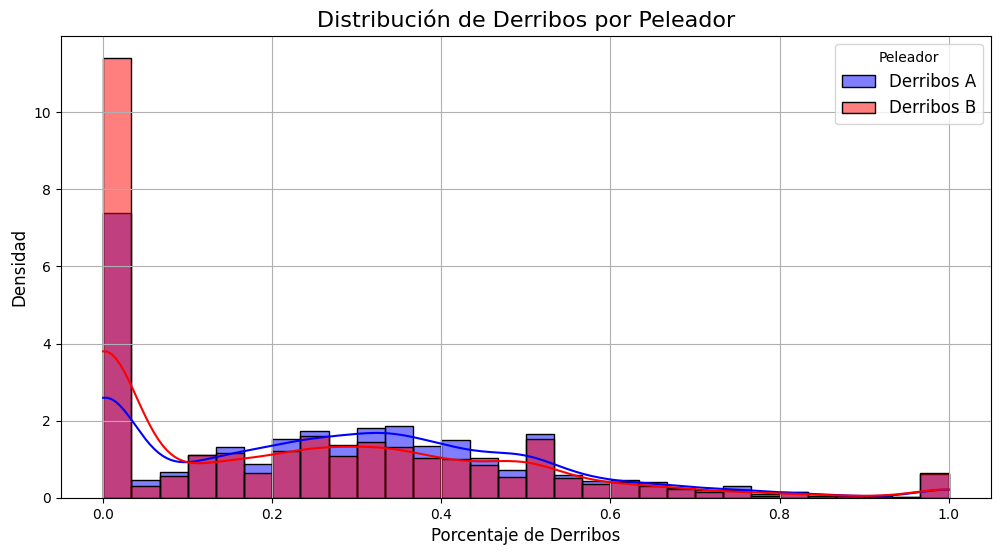

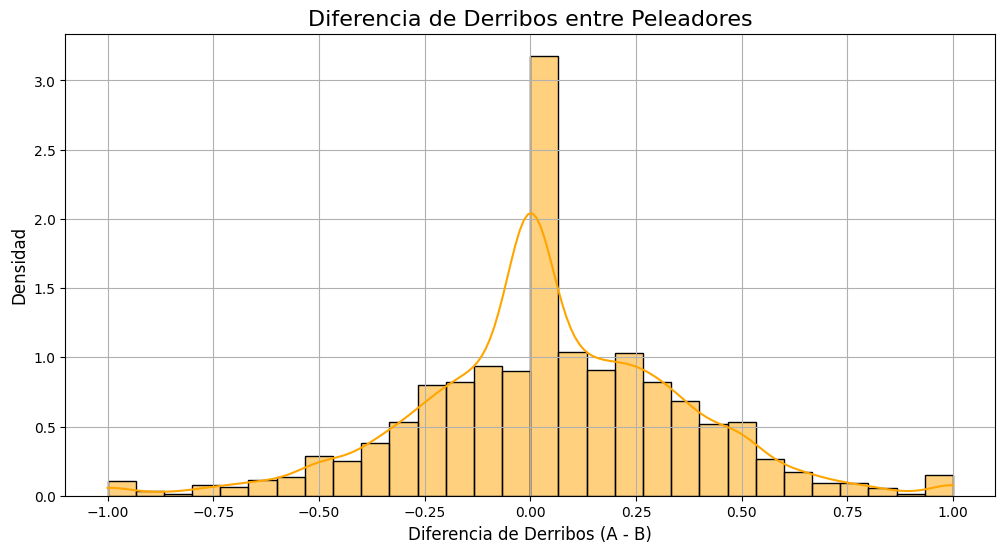

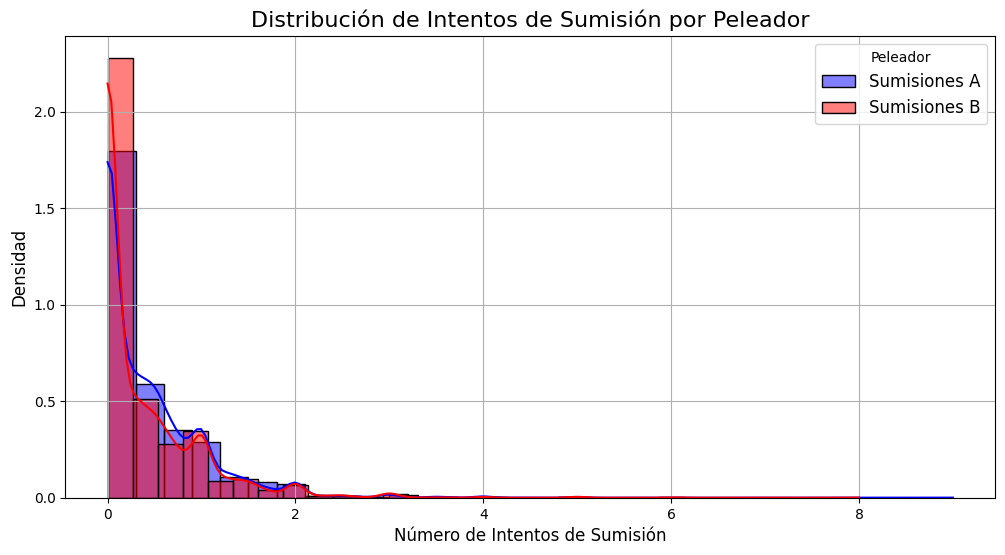

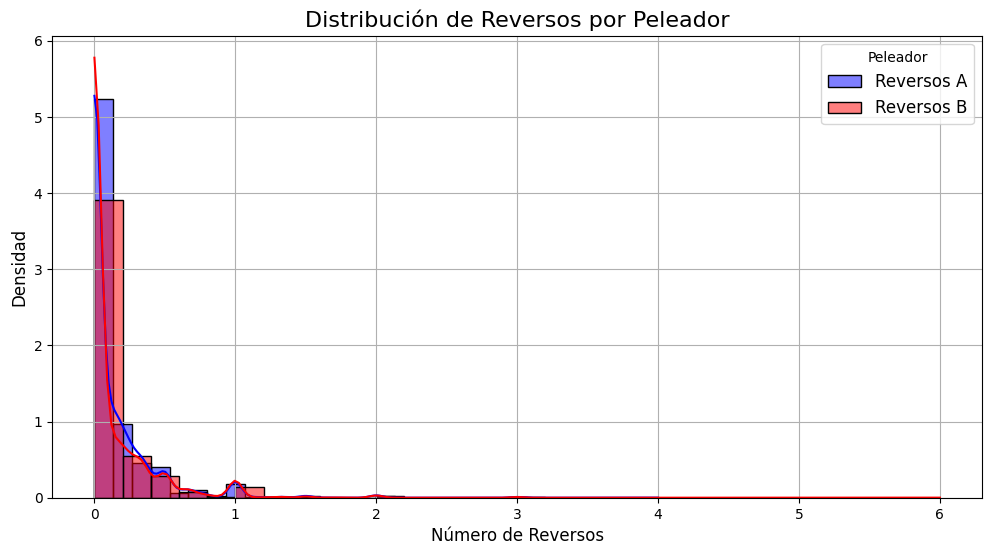

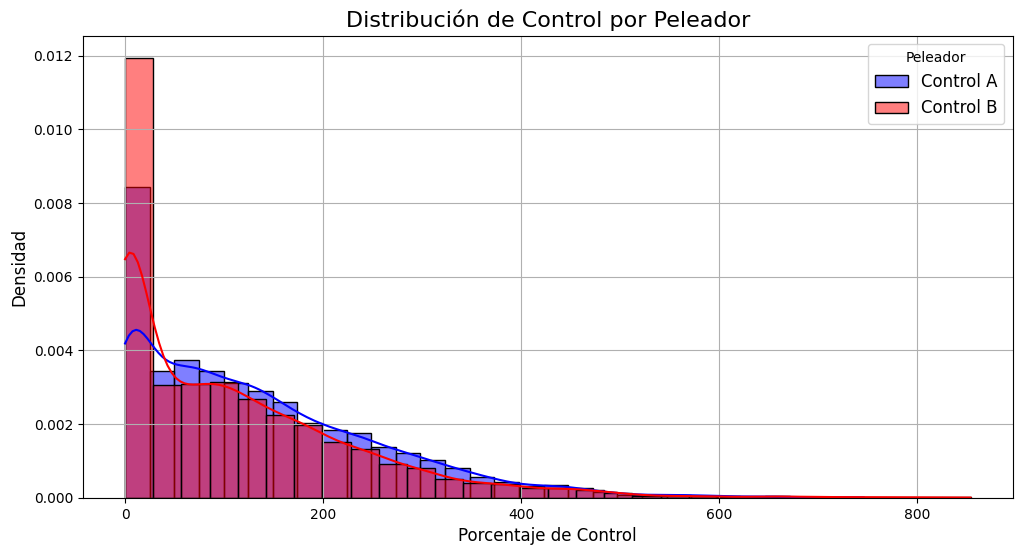

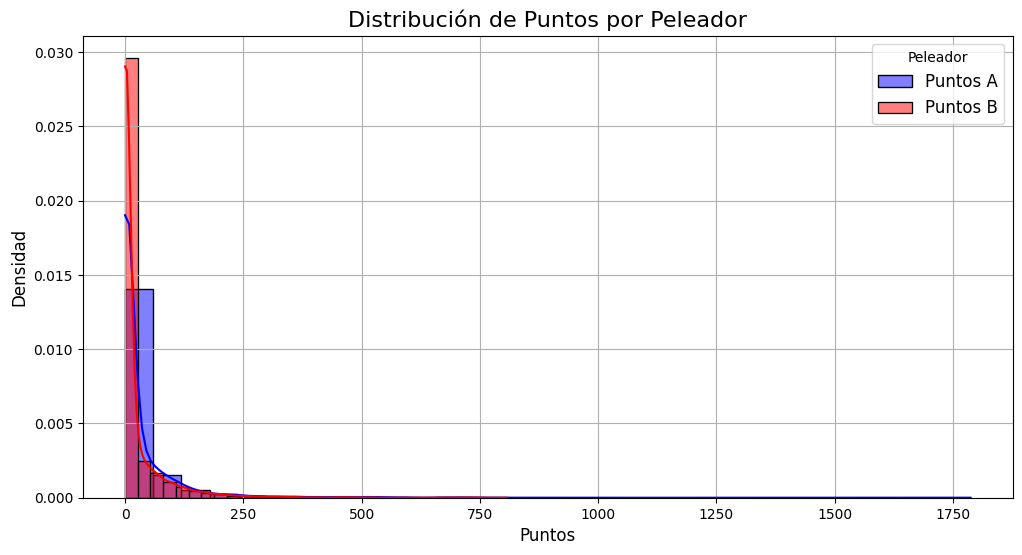

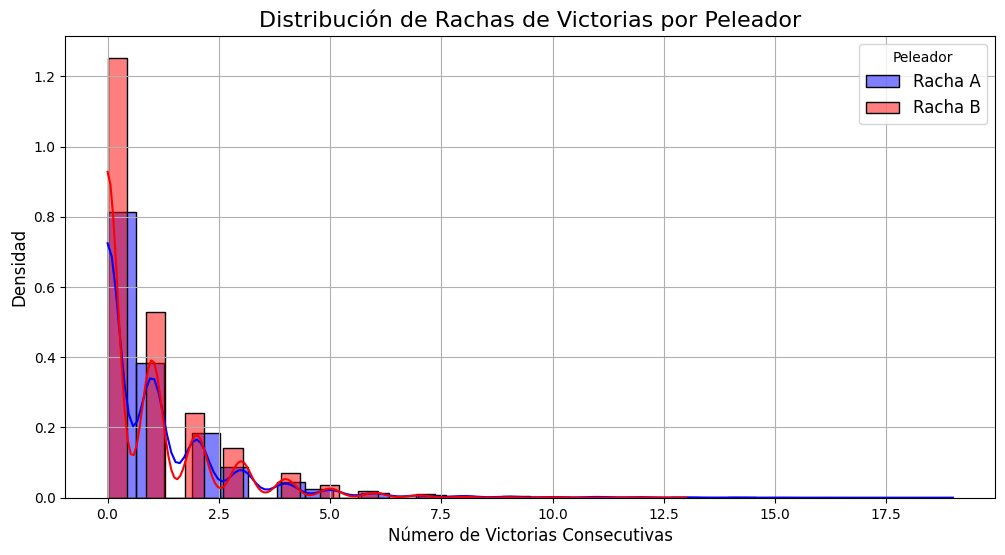

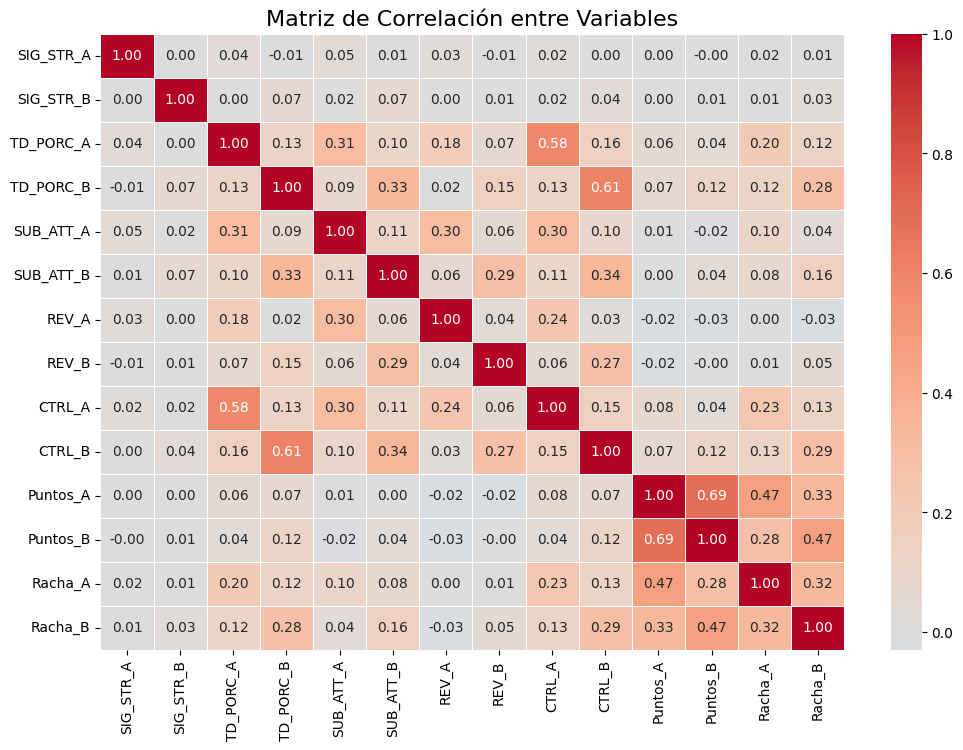

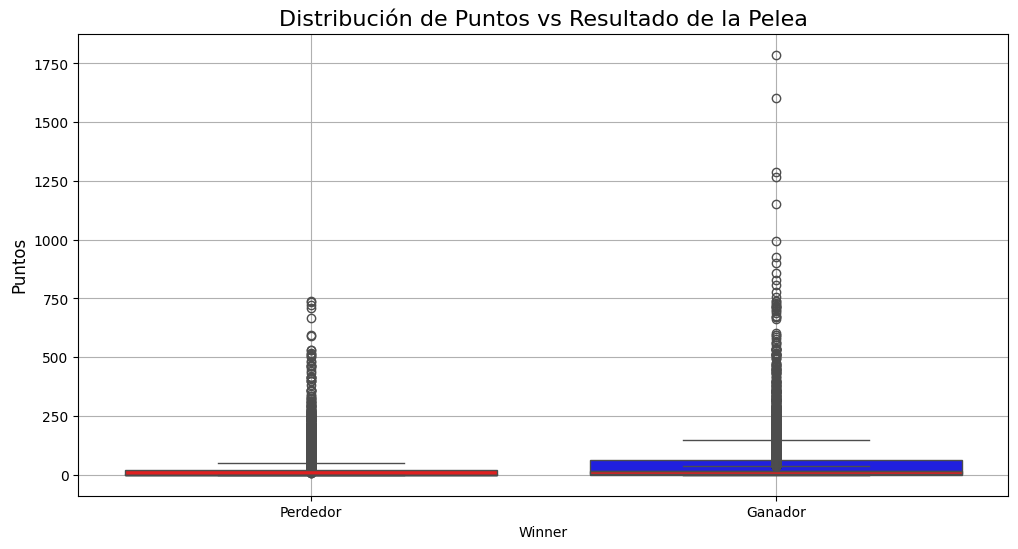

ValueError: Could not interpret value `METHOD` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que 'df' es el DataFrame con los datos proporcionados

# 1. Distribución de Golpes Significativos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['SIG_STR_A'], kde=True, color='blue', label='Golpes A', bins=30, stat="density")
sns.histplot(df['SIG_STR_B'], kde=True, color='red', label='Golpes B', bins=30, stat="density")
plt.title("Distribución de Golpes Significativos por Peleador", fontsize=16)
plt.xlabel("Golpes Significativos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 2. Diferencia de Golpes Significativos entre los Peleadores
df['SIG_STR_DIFF'] = df['SIG_STR_A'] - df['SIG_STR_B']
plt.figure(figsize=(12,6))
sns.histplot(df['SIG_STR_DIFF'], kde=True, color='green', bins=30, stat="density")
plt.title("Diferencia de Golpes Significativos entre Peleadores", fontsize=16)
plt.xlabel("Diferencia de Golpes Significativos (A - B)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.grid(True)
plt.show()

# 3. Distribución de Derribos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['TD_PORC_A'], kde=True, color='blue', label='Derribos A', bins=30, stat="density")
sns.histplot(df['TD_PORC_B'], kde=True, color='red', label='Derribos B', bins=30, stat="density")
plt.title("Distribución de Derribos por Peleador", fontsize=16)
plt.xlabel("Porcentaje de Derribos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 4. Diferencia de Derribos entre los Peleadores
df['TD_DIFF'] = df['TD_PORC_A'] - df['TD_PORC_B']
plt.figure(figsize=(12,6))
sns.histplot(df['TD_DIFF'], kde=True, color='orange', bins=30, stat="density")
plt.title("Diferencia de Derribos entre Peleadores", fontsize=16)
plt.xlabel("Diferencia de Derribos (A - B)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.grid(True)
plt.show()

# 5. Comparación de Intentos de Sumisión
plt.figure(figsize=(12,6))
sns.histplot(df['SUB_ATT_A'], kde=True, color='blue', label='Sumisiones A', bins=30, stat="density")
sns.histplot(df['SUB_ATT_B'], kde=True, color='red', label='Sumisiones B', bins=30, stat="density")
plt.title("Distribución de Intentos de Sumisión por Peleador", fontsize=16)
plt.xlabel("Número de Intentos de Sumisión", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 6. Comparación de Reversos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['REV_A'], kde=True, color='blue', label='Reversos A', bins=30, stat="density")
sns.histplot(df['REV_B'], kde=True, color='red', label='Reversos B', bins=30, stat="density")
plt.title("Distribución de Reversos por Peleador", fontsize=16)
plt.xlabel("Número de Reversos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 7. Comparación de Control (CTRL) por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['CTRL_A'], kde=True, color='blue', label='Control A', bins=30, stat="density")
sns.histplot(df['CTRL_B'], kde=True, color='red', label='Control B', bins=30, stat="density")
plt.title("Distribución de Control por Peleador", fontsize=16)
plt.xlabel("Porcentaje de Control", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 8. Comparación de Puntos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['Puntos_A'], kde=True, color='blue', label='Puntos A', bins=30, stat="density")
sns.histplot(df['Puntos_B'], kde=True, color='red', label='Puntos B', bins=30, stat="density")
plt.title("Distribución de Puntos por Peleador", fontsize=16)
plt.xlabel("Puntos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 9. Comparación de Rachas de Victorias por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['Racha_A'], kde=True, color='blue', label='Racha A', bins=30, stat="density")
sns.histplot(df['Racha_B'], kde=True, color='red', label='Racha B', bins=30, stat="density")
plt.title("Distribución de Rachas de Victorias por Peleador", fontsize=16)
plt.xlabel("Número de Victorias Consecutivas", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 10. Matriz de Correlación entre Variables Clave
correlation_matrix = df[['SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B', 
                          'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B', 'Puntos_A', 'Puntos_B', 'Racha_A', 'Racha_B']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title("Matriz de Correlación entre Variables", fontsize=16)
plt.show()

# 11. Comparación de Puntos vs Resultado de Pelea
df['Winner'] = df['Puntos_A'] > df['Puntos_B']
plt.figure(figsize=(12,6))
sns.boxplot(x='Winner', y='Puntos_A', data=df, color='blue')
sns.boxplot(x='Winner', y='Puntos_B', data=df, color='red')
plt.title("Distribución de Puntos vs Resultado de la Pelea", fontsize=16)
plt.xticks([0, 1], ['Perdedor', 'Ganador'])
plt.ylabel("Puntos", fontsize=12)
plt.grid(True)
plt.show()

# 12. Distribución de Métodos de Victoria
plt.figure(figsize=(12,6))
sns.countplot(x='METHOD', data=df, palette='viridis')
plt.title("Distribución de Métodos de Victoria", fontsize=16)
plt.xlabel("Método de Victoria", fontsize=12)
plt.ylabel("Número de Peleas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 13. Tendencia de Peleas por Año
df['Fecha'] = pd.to_datetime(df['Fecha'])  # Convertir fechas
df['Year'] = df['Fecha'].dt.year
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df, palette='magma')
plt.title("Número de Peleas por Año", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de Peleas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


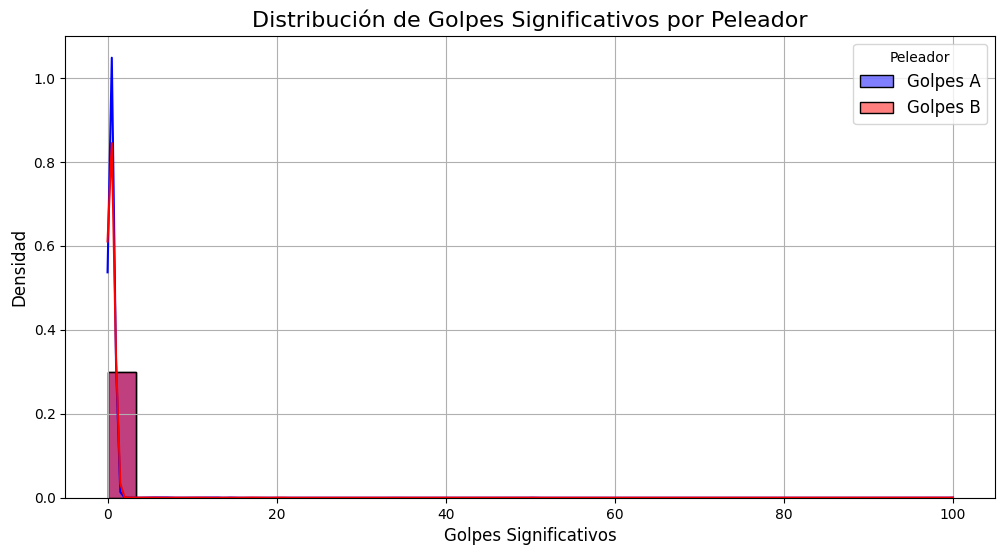

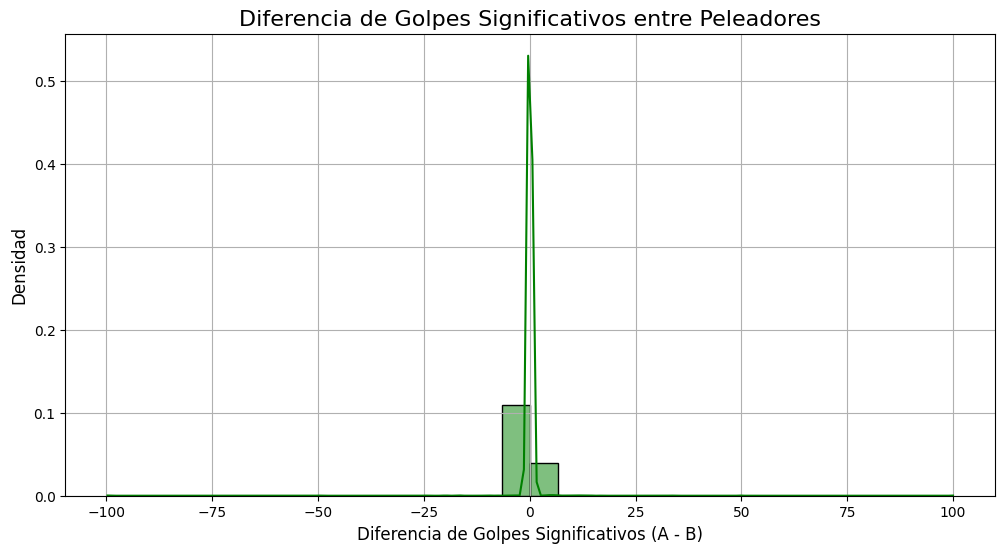

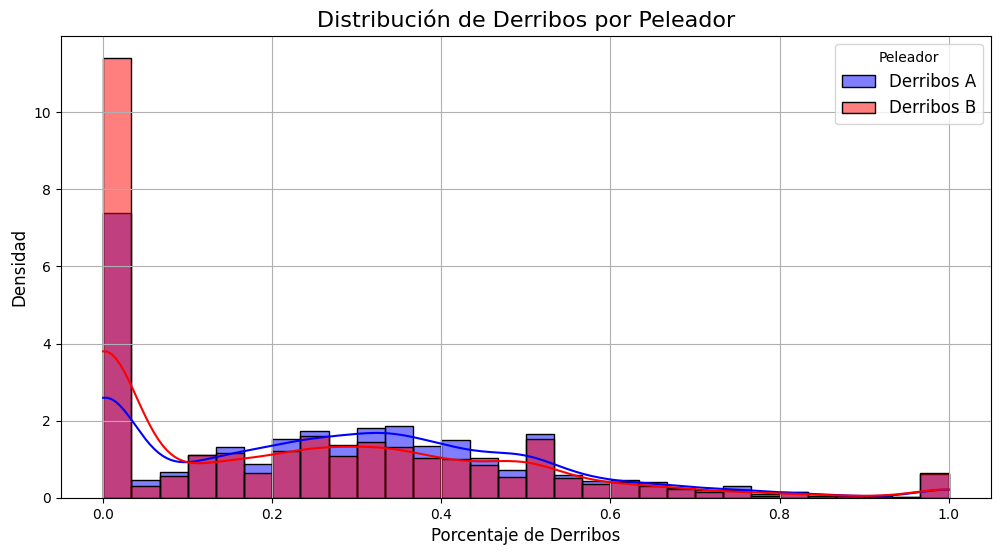

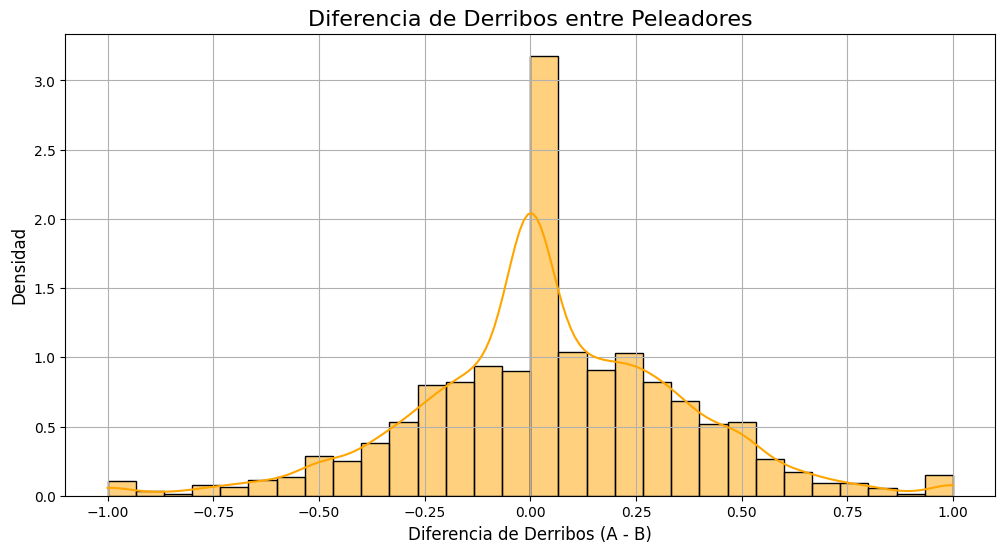

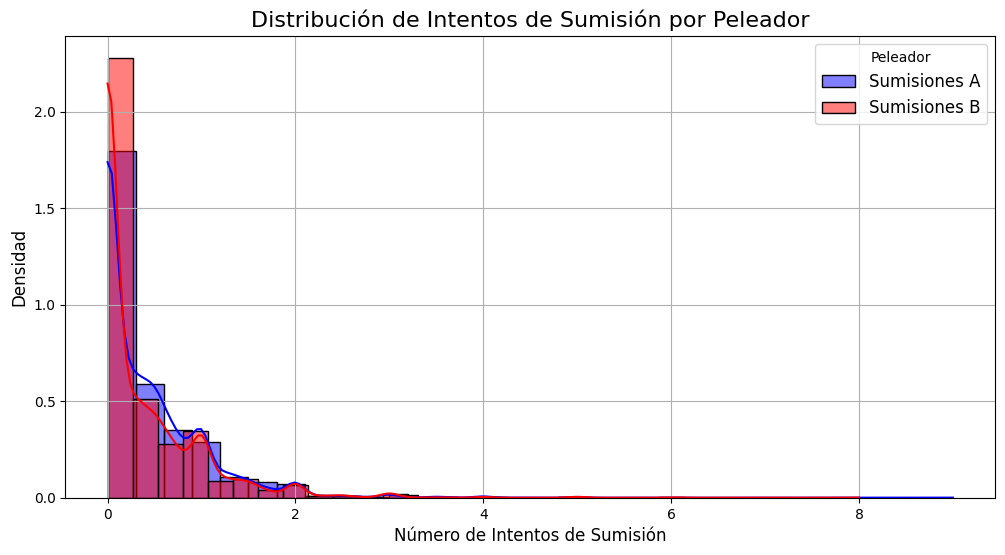

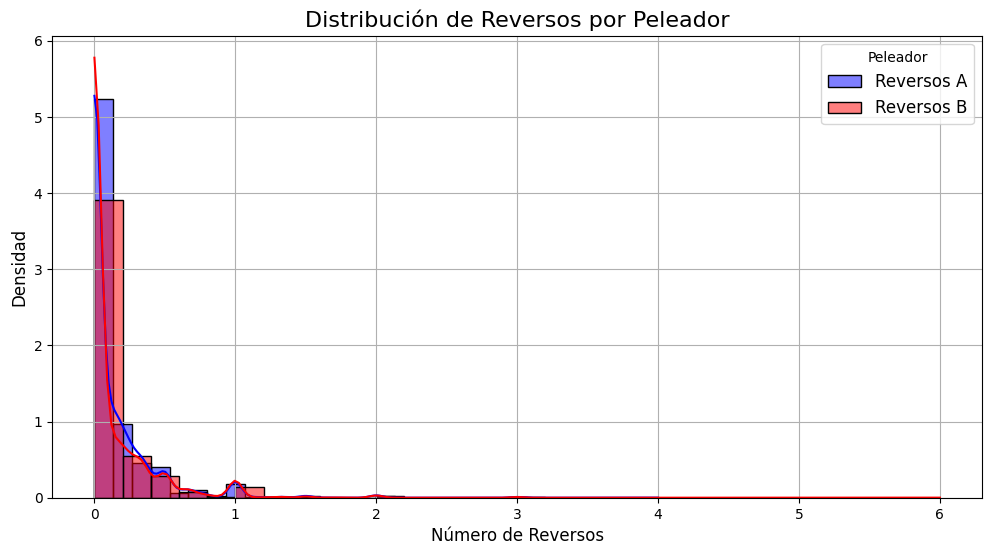

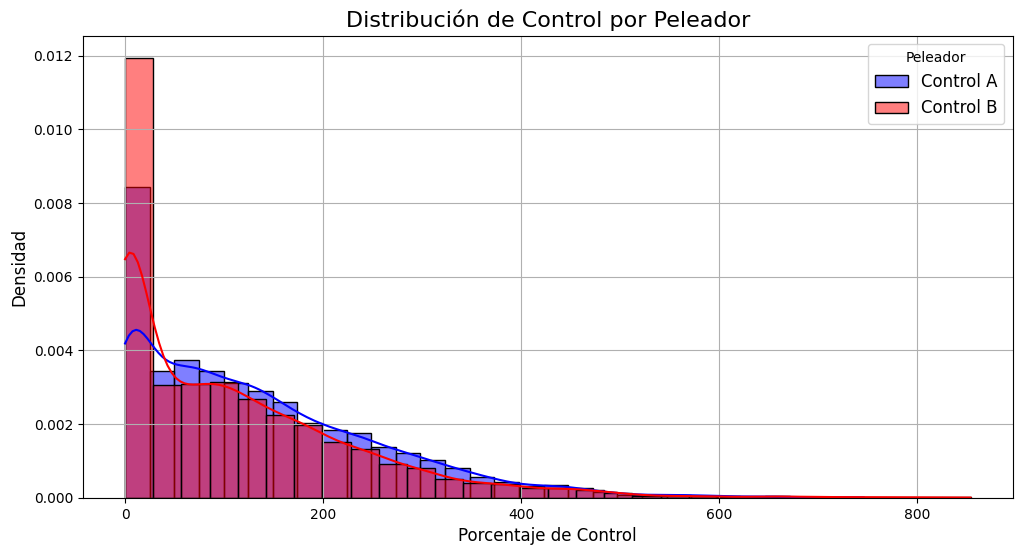

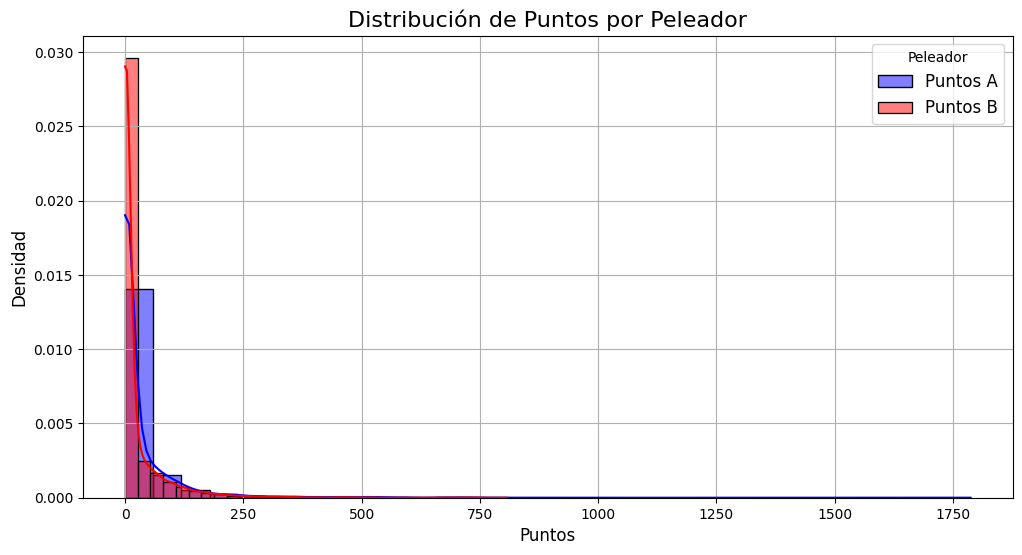

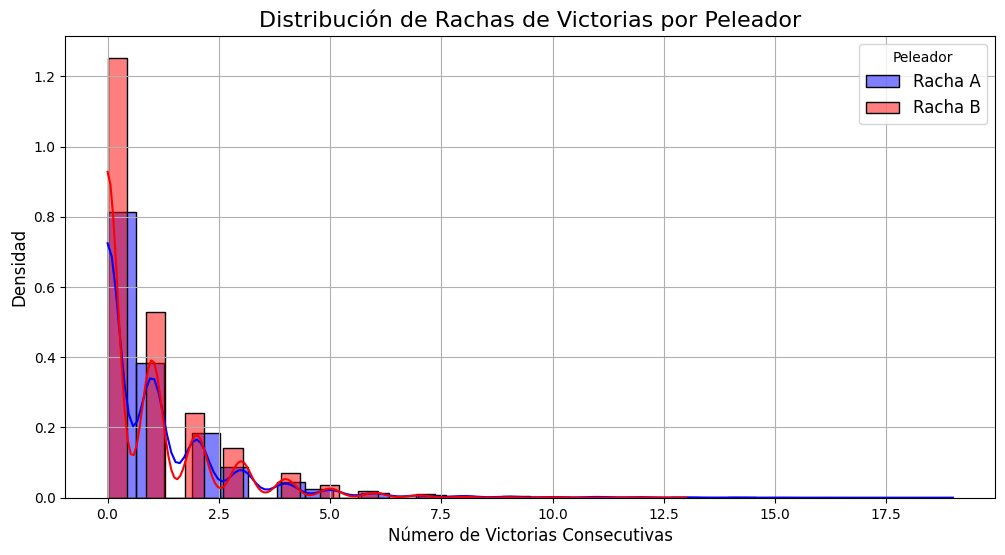

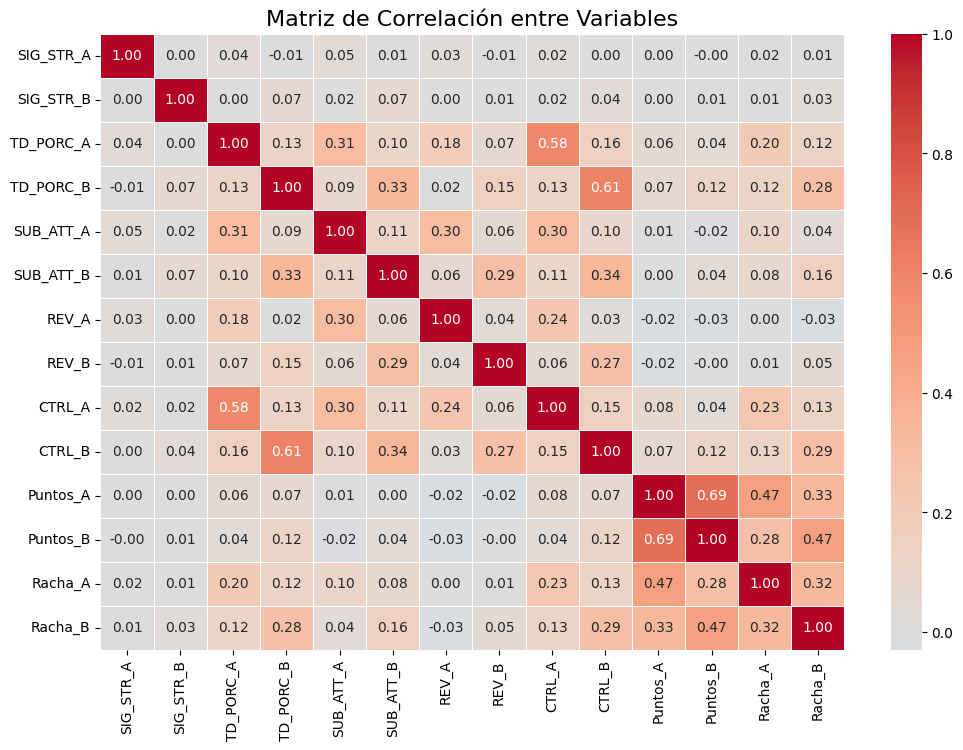

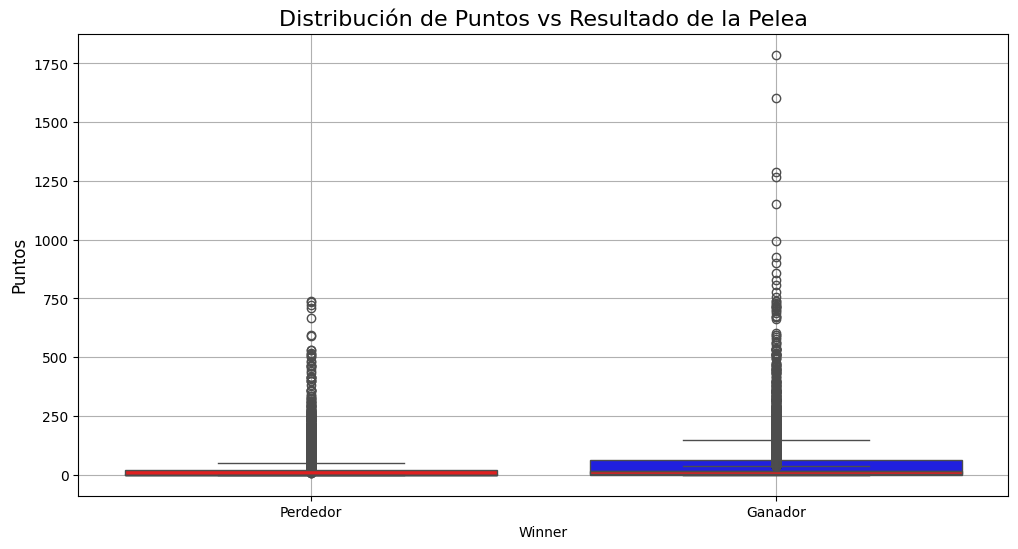

ValueError: Could not interpret value `METHOD` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Calcular la media de los golpes significativos por peleador
mean_sig_str_A = df['SIG_STR_A'].mean()
mean_sig_str_B = df['SIG_STR_B'].mean()

# Crear un gráfico de barras para comparar las medias
plt.figure(figsize=(8,6))
sns.barplot(x=['Peleador A', 'Peleador B'], y=[mean_sig_str_A, mean_sig_str_B], palette='coolwarm')
plt.title("Comparación de la Media de Golpes Significativos entre Peleadores", fontsize=16)
plt.xlabel("Peleador", fontsize=12)
plt.ylabel("Media de Golpes Significativos", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# 2. Diferencia de Golpes Significativos entre los Peleadores
df['SIG_STR_DIFF'] = df['SIG_STR_A'] - df['SIG_STR_B']
plt.figure(figsize=(12,6))
sns.histplot(df['SIG_STR_DIFF'], kde=True, color='green', bins=30, stat="density")
plt.title("Diferencia de Golpes Significativos entre Peleadores", fontsize=16)
plt.xlabel("Diferencia de Golpes Significativos (A - B)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.grid(True)
plt.show()

# 3. Distribución de Derribos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['TD_PORC_A'], kde=True, color='blue', label='Derribos A', bins=30, stat="density")
sns.histplot(df['TD_PORC_B'], kde=True, color='red', label='Derribos B', bins=30, stat="density")
plt.title("Distribución de Derribos por Peleador", fontsize=16)
plt.xlabel("Porcentaje de Derribos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 4. Diferencia de Derribos entre los Peleadores
df['TD_DIFF'] = df['TD_PORC_A'] - df['TD_PORC_B']
plt.figure(figsize=(12,6))
sns.histplot(df['TD_DIFF'], kde=True, color='orange', bins=30, stat="density")
plt.title("Diferencia de Derribos entre Peleadores", fontsize=16)
plt.xlabel("Diferencia de Derribos (A - B)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.grid(True)
plt.show()

# 5. Comparación de Intentos de Sumisión
plt.figure(figsize=(12,6))
sns.histplot(df['SUB_ATT_A'], kde=True, color='blue', label='Sumisiones A', bins=30, stat="density")
sns.histplot(df['SUB_ATT_B'], kde=True, color='red', label='Sumisiones B', bins=30, stat="density")
plt.title("Distribución de Intentos de Sumisión por Peleador", fontsize=16)
plt.xlabel("Número de Intentos de Sumisión", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 6. Comparación de Reversos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['REV_A'], kde=True, color='blue', label='Reversos A', bins=30, stat="density")
sns.histplot(df['REV_B'], kde=True, color='red', label='Reversos B', bins=30, stat="density")
plt.title("Distribución de Reversos por Peleador", fontsize=16)
plt.xlabel("Número de Reversos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 7. Comparación de Control (CTRL) por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['CTRL_A'], kde=True, color='blue', label='Control A', bins=30, stat="density")
sns.histplot(df['CTRL_B'], kde=True, color='red', label='Control B', bins=30, stat="density")
plt.title("Distribución de Control por Peleador", fontsize=16)
plt.xlabel("Porcentaje de Control", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 8. Comparación de Puntos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['Puntos_A'], kde=True, color='blue', label='Puntos A', bins=30, stat="density")
sns.histplot(df['Puntos_B'], kde=True, color='red', label='Puntos B', bins=30, stat="density")
plt.title("Distribución de Puntos por Peleador", fontsize=16)
plt.xlabel("Puntos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 9. Comparación de Rachas de Victorias por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['Racha_A'], kde=True, color='blue', label='Racha A', bins=30, stat="density")
sns.histplot(df['Racha_B'], kde=True, color='red', label='Racha B', bins=30, stat="density")
plt.title("Distribución de Rachas de Victorias por Peleador", fontsize=16)
plt.xlabel("Número de Victorias Consecutivas", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 10. Matriz de Correlación entre Variables Clave
correlation_matrix = df[['SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B', 
                          'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B', 'Puntos_A', 'Puntos_B', 'Racha_A', 'Racha_B']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title("Matriz de Correlación entre Variables", fontsize=16)
plt.show()

# 11. Comparación de Puntos vs Resultado de Pelea
df['Winner'] = df['Puntos_A'] > df['Puntos_B']
plt.figure(figsize=(12,6))
sns.boxplot(x='Winner', y='Puntos_A', data=df, color='blue')
sns.boxplot(x='Winner', y='Puntos_B', data=df, color='red')
plt.title("Distribución de Puntos vs Resultado de la Pelea", fontsize=16)
plt.xticks([0, 1], ['Perdedor', 'Ganador'])
plt.ylabel("Puntos", fontsize=12)
plt.grid(True)
plt.show()

# 12. Distribución de Métodos de Victoria
plt.figure(figsize=(12,6))
sns.countplot(x='METHOD', data=df, palette='viridis')
plt.title("Distribución de Métodos de Victoria", fontsize=16)
plt.xlabel("Método de Victoria", fontsize=12)
plt.ylabel("Número de Peleas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 13. Tendencia de Peleas por Año
df['Fecha'] = pd.to_datetime(df['Fecha'])  # Convertir fechas
df['Year'] = df['Fecha'].dt.year
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df, palette='magma')
plt.title("Número de Peleas por Año", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de Peleas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
